In [15]:
import pandas as pd
import pickle
data = pickle.load(open('post_topics_test.pkl', 'rb'))
print(len(data))

/Users/zhangtaiwei/htdocs/hackthon/venv/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


42320


In [16]:
post_view = pd.read_csv('5-1~6-1-user-posts-view.csv')

In [17]:
post_view

,post_id,member_id
0,228783671,1163525
1,228784548,2768698
2,228784548,1215301
3,228784634,61620
4,228789821,1118504
5,228791025,33991
6,226686675,1993434
7,226872666,137752
8,228783099,2651806
9,228783099,2346160


In [18]:
import requests
result_table = {i['id']:i['name'] for i in requests.get('https://www.dcard.tw/v2/forums').json()}
forum_name = {i['name'] for i in requests.get('https://www.dcard.tw/v2/forums').json()}

In [19]:
college = [i['name'] for i in requests.get('https://www.dcard.tw/v2/forums').json() if '一個能讓你暢所欲言的地方' in i['description'] or '大學' in i['name'] or '科大' in i['name'] or '學院' in i['name']]

In [20]:
'淡江大學' in college

True

In [21]:
data[22]

(228946695, '#新聞  航空公司未配合改台灣名 中國:期限再延兩個月', '媒體來源：中央社\n\n航空公司未配合改台灣名 中國:期限再延兩個月\n\n（中央社台北25日電）中國官方4月25日致函44家外國航空公司要求修改對台灣的稱呼，並給出30天的期限。今天是「大限之日」，仍有逾半航空公司未改名稱，中國官方今晚透 過官媒表示，同意將期限再延兩個月。\n\n新華社今天晚間 ... (326 characters truncated) ... 表示，中國大陸常以強迫改名方式，干擾各國民間公司，要求更改台灣名稱，這是徒增反感的魯莽行為，並嚴正地告訴中國大陸「立刻停止這種損人不利己的作為 」。（編輯：陳家倫）1070525\n\nhttp://www.cna.com.tw/news/firstnews/201805250322-1.aspx', UUID('fc7574ad-e1df-43d2-bb06-8825c718c065'), datetime.datetime(2018, 5, 25, 14, 18, 19, 920000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None)), ['新聞'])

In [22]:
from udicOpenData.stopwords import rmsw
result = []
forum_occur = set()
for i in data:
    if result_table[str(i[3])] not in college + ['新生季', '小禮物', '母親節', '新生季', '災害回報', '畢業季', '聖誕遊樂園🌲', 'Dcard', '大型賽事']:
        forum_occur.add(result_table[str(i[3])])
        result.append((i[0], ' '.join(rmsw(i[1])) +' '.join(rmsw(i[2])) +(' '+result_table[str(i[3])]) * 50, ' '.join(i[5]) +(' '+ result_table[str(i[3])])*2))
print(len(forum_occur))
print(forum_occur)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangtaiwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhangtaiwei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/zhangtaiwei/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/zhangtaiwei/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangtaiwei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/72/8pw796bj2nv21y6vnms4ms0w0000gn/T/jieba.cache
Loading model cost 0.856 seconds.
Prefix dict has been built succesfully.


43
{'閒聊', '手作', '戲劇綜藝', '感情', '汽機車', '健身', '語言', '寶可夢', '有趣', '打工職缺', '時事', '寵物', '音樂', '西斯', '穿搭', '書籍', '美妝', 'BL', '男孩', '星座', '追星', '彩虹', '旅遊', '工作', '電影', '心情', '攝影', '女孩', '留學', '美食', '運動', '靈異', '實習職缺', '遊戲', '無痕生活', '3C', '詩文', '居家生活', '理財', '課程', '動漫', '網路購物', '考試'}


In [23]:
result[122]

(228907883,
 '問 鞋子 品牌gur gur dnZWW gur zdHqsqg 想 知道 這雙 鞋 牌子 買 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭 穿搭',
 '球鞋 穿搭 穿搭')

In [24]:
df = pd.DataFrame(result, columns=['post_id', 'content', 'hashtag'])

In [25]:
df.loc[0, 'content']

'研究所 企研不好意思 打擾 小弟 不才 一位 高雄 餐旅 大學 管理 科系 學生 統測 多分 目前 大一 一位 觀光 科系 畢業 渣 渣 原本 國中 考上 國立 工科 電子科 想說 半導體 接觸 重金屬 轉而 看似 未來 發展 不錯 觀光 高職 時 專一 專二太 簡單 額外 吸收 高中 類組 文 法 商 知識 註 當初 四技 二專 錄取 高 第一 應英 高餐 旅館 最後 選擇 高餐 後悔 QAQ 敝校 學生 腦袋 知識 鄙陋 讀 管理 科系 學生 完全 具備 管理 知識 整天 耍 廢 講 一堆 五四三 東西 敝校 別名 餐旅界 台大 或台 科大 真是 天大 謊言 廚科 例外 高餐 管理 科系 不用說 到頂 中 私立 普大 逢甲 東海 靜宜 世新 輔仁 文化 銘傳 東吳 元智 管理 科系 一比 根本 比不上 想當然 爾 國立 普大 比不上 高餐 根本 讀書 風氣 敝校 圖書館 永遠 超過 人 平時 喜歡 吸收 天下 遠見 商周 今周 經理人 財經 管理 雜誌 憤而想 準備 考取 政 中 北大 台科 企研 經濟學 管理學 or 統計學 商數 基礎 渣 渣 QAQ 想 請問 大神 自修 書 比較 推薦 補習 好貴 QAQ 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程 課程'

In [26]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
np.random.seed(2018)


In [27]:
def list_rmsw(x):
    return [i for i in x.split() if len(i) > 1 and i != 'gur']
processed_docs = df['content'].map(list_rmsw)

In [28]:
print(processed_docs[:10])
print(processed_docs)
print(len(forum_name - set(college)))
print((forum_name - set(college)) - forum_occur)

0    [研究所, 企研不好意思, 打擾, 小弟, 不才, 一位, 高雄, 餐旅, 大學, 管理, ...
1    [HER, HER, 遇見, 妳第一次, 發文, 請見, 之前, 滑狄卡, 看到, 一些, ...
2    [長大, 代價小時候, 每個人, 相處, 自在, 利害關係, 你爭, 真誠, 心來, 交朋友...
3    [推薦, 漫畫, 灑狗血最近, 大愛, 山本小鐵子, 老師, 作品, 像是, 兄弟, 心願,...
4    [跪求, 老司, 機們給, 連結嗚嗚, 看著, 截圖, 跪求, 補個, 連結, qaq, 睡...
5    [蝦皮, 還能, 退款, 求解事情, 是這樣的, 朋友, 蝦皮, 手機, 兩個, 賣家, 詢...
6    [尋找, 男友, 片今天, 宅男, 腐女, 戀愛, 真難, 裡面, 內容, 日常, 好好笑,...
7    [修車, 吃飯手機, 排版, 請見, 不多, 直接, 進入, 正題, 最近, 我的, 機車,...
8    [第一次, 見面, 有點, 長前言, 軟體, 認識, 加賴, 無間斷, 聊到, 一個月, 之...
9    [每天, 一瓶, 不知, 有沒有, qnvWHcO, 閒聊, 閒聊, 閒聊, 閒聊, 閒聊,...
Name: content, dtype: object
0        [研究所, 企研不好意思, 打擾, 小弟, 不才, 一位, 高雄, 餐旅, 大學, 管理, ...
1        [HER, HER, 遇見, 妳第一次, 發文, 請見, 之前, 滑狄卡, 看到, 一些, ...
2        [長大, 代價小時候, 每個人, 相處, 自在, 利害關係, 你爭, 真誠, 心來, 交朋友...
3        [推薦, 漫畫, 灑狗血最近, 大愛, 山本小鐵子, 老師, 作品, 像是, 兄弟, 心願,...
4        [跪求, 老司, 機們給, 連結嗚嗚, 看著, 截圖, 跪求, 補個, 連結, qaq, 睡...
5        [蝦皮, 還能, 退款, 求解事情, 是這樣的, 朋友, 蝦皮, 手機, 兩個, 賣家, 詢...
6        [尋找, 男友, 片今天, 宅男, 腐女, 戀愛, 真難, 裡面, 內容, 日常, 好好笑,...
7       

In [29]:
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=30, no_above=0.5, keep_n=100000)
hashtags = {i[1] for i in dictionary.iteritems()}
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
lda = gensim.models.LdaMulticore(bow_corpus, num_topics=len(forum_occur), id2word=dictionary, passes=2, workers=2)

In [30]:
lda.show_topics(43, formatted=False)

[(0,
  [('語言', 0.5141168),
   ('英文', 0.023191778),
   ('3C', 0.020346193),
   ('考試', 0.01760901),
   ('中文', 0.011575184),
   ('聽力', 0.007750607),
   ('單字', 0.007517009),
   ('多益', 0.0061592576),
   ('日文', 0.005963543),
   ('老師', 0.0043169274)]),
 (1,
  [('閒聊', 0.80909824),
   ('有人', 0.002911822),
   ('知道', 0.002158007),
   ('請問', 0.0021254434),
   ('不知', 0.0020087068),
   ('有沒有', 0.0020036618),
   ('看到', 0.0018593561),
   ('朋友', 0.0014358347),
   ('jpg', 0.0013406262),
   ('音樂', 0.0011878281)]),
 (2,
  [('西斯', 0.4993769),
   ('音樂', 0.08932613),
   ('我的', 0.007930598),
   ('喜歡', 0.0049042753),
   ('男友', 0.0036704834),
   ('想要', 0.0035607873),
   ('感覺', 0.0031131385),
   ('高潮', 0.0029778273),
   ('舒服', 0.0026819115),
   ('主人', 0.0026783813)]),
 (3,
  [('課程', 0.68855554),
   ('報名', 0.008339983),
   ('問卷', 0.005224538),
   ('培訓', 0.00494533),
   ('論壇', 0.004364084),
   ('標籤', 0.004173652),
   ('東海', 0.0040007913),
   ('暑修', 0.0033328244),
   ('設計', 0.0032366624),
   ('學生', 0.0031811432)]),

In [31]:
topic2forum = {i[0]:i[1][0][0] for i in lda.show_topics(len(forum_occur), formatted=False)}

In [32]:
# del topic2forum[5]
# del topic2forum[6]
# del topic2forum[7]
# del topic2forum[26]
# del topic2forum[30]

print(topic2forum)

{0: '語言', 1: '閒聊', 2: '西斯', 3: '課程', 4: '美食', 5: '星座', 6: '星座', 7: '問卷', 8: '工作', 9: '詩文', 10: '留學', 11: '閒聊', 12: '感情', 13: '時事', 14: '女孩', 15: '彩虹', 16: '心情', 17: '美妝', 18: '寵物', 19: '3C', 20: '心情', 21: '穿搭', 22: '電影', 23: '追星', 24: '遊戲', 25: '動漫', 26: '比較', 27: '打工職缺', 28: '美食', 29: '考試', 30: 'com', 31: '無痕生活', 32: '居家生活', 33: '時事', 34: '戲劇綜藝', 35: '健身', 36: '手作', 37: '男孩', 38: '汽機車', 39: '攝影', 40: 'BL', 41: '有趣', 42: '網路購物'}


In [33]:
[dictionary[i[0]] for i in lda.get_topic_terms(39, topn=20)]

['攝影',
 'jpg',
 'stagram',
 '作品',
 '照片',
 '3C',
 '喜歡',
 '相機',
 '底片',
 'IG',
 '分享',
 '我的',
 '歡迎',
 '手機',
 '追蹤',
 '拍攝',
 '原圖',
 '看到',
 '單眼',
 '拍照']

In [34]:
topic2forum

{0: '語言',
 1: '閒聊',
 2: '西斯',
 3: '課程',
 4: '美食',
 5: '星座',
 6: '星座',
 7: '問卷',
 8: '工作',
 9: '詩文',
 10: '留學',
 11: '閒聊',
 12: '感情',
 13: '時事',
 14: '女孩',
 15: '彩虹',
 16: '心情',
 17: '美妝',
 18: '寵物',
 19: '3C',
 20: '心情',
 21: '穿搭',
 22: '電影',
 23: '追星',
 24: '遊戲',
 25: '動漫',
 26: '比較',
 27: '打工職缺',
 28: '美食',
 29: '考試',
 30: 'com',
 31: '無痕生活',
 32: '居家生活',
 33: '時事',
 34: '戲劇綜藝',
 35: '健身',
 36: '手作',
 37: '男孩',
 38: '汽機車',
 39: '攝影',
 40: 'BL',
 41: '有趣',
 42: '網路購物'}

In [35]:
[(topic2forum[i[0]], i[1]) for i in lda.get_document_topics(bow_corpus[3243])]

[('美妝', 0.045093343),
 ('寵物', 0.8916848),
 ('居家生活', 0.02226809),
 ('BL', 0.02917482)]

In [36]:
[dictionary[i] for i, j in bow_corpus[3243]]

['推薦',
 '比較',
 '之前',
 '看到',
 '發現',
 '踩到',
 '我的',
 '分享',
 '最近',
 '一個月',
 '拜託',
 '謝謝',
 '寵物',
 '家裡',
 'QQ',
 '便宜',
 'qq',
 '啊啊啊',
 '爬文',
 '用量',
 '公斤',
 '豆腐',
 '大便',
 '改用']

In [37]:
post_dict = {row['post_id']: row['content'] for index, row in df.iterrows()}

In [38]:
list(post_view.loc[post_view['member_id'] == 742480]['post_id'])

[228152984,
 226370491,
 227613786,
 228459623,
 228415764,
 227720773,
 228343090,
 228242289,
 226377661,
 225859768,
 228580260,
 225985802,
 225883644,
 228577647,
 228345967,
 228269579,
 225665613,
 228001113,
 228000883,
 225997275,
 219435569,
 228399610,
 228241059,
 228223688,
 228112121,
 227798844,
 228809277,
 228806887,
 228813783,
 228811854,
 228807823,
 228807981,
 228811451,
 228806686,
 228809290,
 228813354,
 228808274,
 228809856,
 228806294,
 228808528,
 228808278,
 228809175,
 228809892,
 228810857,
 228808102,
 226429869,
 228809800,
 228808440,
 228813795,
 228808799,
 228805878,
 228810370,
 228807498,
 228807091,
 228811350,
 228809273,
 224449070,
 224623311,
 905083,
 228868159,
 228871140,
 228873469,
 228318941,
 228867940,
 228871727,
 228443188,
 228831616,
 228866216,
 228869002,
 228866648,
 228866982,
 228316177,
 224620628,
 228913745,
 228918158,
 228915112,
 228914506,
 228917262,
 228913702,
 228912998,
 228912461,
 228926628,
 228930321,
 228931

In [39]:
def show_user_profiling(member_id):
    user_view_doc = ' '.join(df[df['post_id'].isin(post_view.loc[post_view['member_id'] == member_id]['post_id'])]['content'])
    return sorted([(topic2forum[i[0]], i[1]) for i in lda.get_document_topics(dictionary.doc2bow(user_view_doc.split()))], key=lambda x:-x[1])

In [61]:
show_user_profiling(1683147)

[('心情', 0.23398684),
 ('美妝', 0.14053112),
 ('比較', 0.09594676),
 ('感情', 0.08953612),
 ('有趣', 0.07171264),
 ('美食', 0.049619336),
 ('追星', 0.04289384),
 ('心情', 0.042567506),
 ('無痕生活', 0.038031798),
 ('女孩', 0.027040515),
 ('寵物', 0.023809033),
 ('美食', 0.021819387),
 ('居家生活', 0.020947931),
 ('彩虹', 0.014899419),
 ('com', 0.0120223425),
 ('時事', 0.011010565)]

In [65]:
from collections import Counter
import tqdm
count = Counter()
for i in tqdm.tqdm(post_view[:300]['member_id']):
    topics = set([topic for topic, _ in show_user_profiling(i)[:5]])
    for topic in topics:
        count[topic] += 1



  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 1/300 [00:00<03:12,  1.55it/s]

  1%|          | 2/300 [00:01<03:01,  1.64it/s]

  1%|          | 3/300 [00:01<03:00,  1.65it/s]

  1%|▏         | 4/300 [00:02<03:00,  1.64it/s]

  2%|▏         | 5/300 [00:02<02:55,  1.68it/s]

  2%|▏         | 6/300 [00:03<02:54,  1.68it/s]

  2%|▏         | 7/300 [00:04<02:52,  1.70it/s]

  3%|▎         | 8/300 [00:04<02:52,  1.69it/s]

  3%|▎         | 9/300 [00:05<02:52,  1.69it/s]

  3%|▎         | 10/300 [00:05<02:51,  1.69it/s]

  4%|▎         | 11/300 [00:06<02:51,  1.69it/s]

  4%|▍         | 12/300 [00:07<02:50,  1.69it/s]

  4%|▍         | 13/300 [00:07<02:50,  1.69it/s]

  5%|▍         | 14/300 [00:08<02:51,  1.67it/s]

  5%|▌         | 15/300 [00:08<02:49,  1.68it/s]

  5%|▌         | 16/300 [00:09<02:48,  1.69it/s]

  6%|▌         | 17/300 [00:10<02:47,  1.69it/s]

  6%|▌         | 18/300 [00:10<02:46,  1.69it/s]

  6%|▋         | 19/300 [00:11<02:46,  1.69it/s]

  7%|▋         |

 48%|████▊     | 145/300 [01:22<01:28,  1.76it/s]

 49%|████▊     | 146/300 [01:23<01:27,  1.76it/s]

 49%|████▉     | 147/300 [01:23<01:27,  1.76it/s]

 49%|████▉     | 148/300 [01:24<01:26,  1.76it/s]

 50%|████▉     | 149/300 [01:24<01:25,  1.76it/s]

 50%|█████     | 150/300 [01:25<01:25,  1.76it/s]

 50%|█████     | 151/300 [01:25<01:24,  1.76it/s]

 51%|█████     | 152/300 [01:26<01:24,  1.76it/s]

 51%|█████     | 153/300 [01:26<01:23,  1.76it/s]

 51%|█████▏    | 154/300 [01:27<01:22,  1.76it/s]

 52%|█████▏    | 155/300 [01:28<01:22,  1.76it/s]

 52%|█████▏    | 156/300 [01:28<01:21,  1.76it/s]

 52%|█████▏    | 157/300 [01:29<01:21,  1.76it/s]

 53%|█████▎    | 158/300 [01:29<01:20,  1.76it/s]

 53%|█████▎    | 159/300 [01:30<01:20,  1.76it/s]

 53%|█████▎    | 160/300 [01:30<01:19,  1.76it/s]

 54%|█████▎    | 161/300 [01:31<01:18,  1.76it/s]

 54%|█████▍    | 162/300 [01:32<01:18,  1.76it/s]

 54%|█████▍    | 163/300 [01:32<01:17,  1.76it/s]

 55%|█████▍    | 164/300 [01:33

 96%|█████████▌| 288/300 [02:48<00:07,  1.71it/s]

 96%|█████████▋| 289/300 [02:49<00:06,  1.71it/s]

 97%|█████████▋| 290/300 [02:49<00:05,  1.71it/s]

 97%|█████████▋| 291/300 [02:50<00:05,  1.71it/s]

 97%|█████████▋| 292/300 [02:50<00:04,  1.71it/s]

 98%|█████████▊| 293/300 [02:51<00:04,  1.71it/s]

 98%|█████████▊| 294/300 [02:51<00:03,  1.71it/s]

 98%|█████████▊| 295/300 [02:52<00:02,  1.71it/s]

 99%|█████████▊| 296/300 [02:52<00:02,  1.71it/s]

 99%|█████████▉| 297/300 [02:53<00:01,  1.71it/s]

 99%|█████████▉| 298/300 [02:54<00:01,  1.71it/s]

100%|█████████▉| 299/300 [02:54<00:00,  1.71it/s]

100%|██████████| 300/300 [02:55<00:00,  1.71it/s]



20 心情
26 比較
12 感情
41 有趣
2 西斯
17 美妝
31 無痕生活
23 追星
[<matplotlib.lines.Line2D object at 0x120e42be0>, <matplotlib.lines.Line2D object at 0x120e48198>, <matplotlib.lines.Line2D object at 0x120e48630>, <matplotlib.lines.Line2D object at 0x120e48a90>, <matplotlib.lines.Line2D object at 0x120e48ef0>, <matplotlib.lines.Line2D object at 0x120e53390>, <matplotlib.lines.Line2D object at 0x120e537f0>, <matplotlib.lines.Line2D object at 0x120e53c50>, <matplotlib.lines.Line2D object at 0x120e590f0>, <matplotlib.lines.Line2D object at 0x120e59550>, <matplotlib.lines.Line2D object at 0x120e36668>, <matplotlib.lines.Line2D object at 0x120e59dd8>, <matplotlib.lines.Line2D object at 0x120131278>, <matplotlib.lines.Line2D object at 0x1201316d8>]


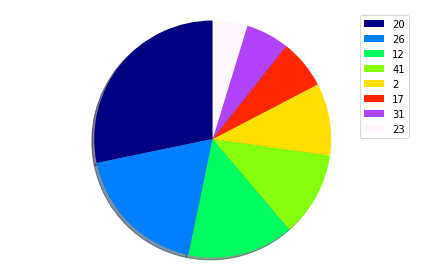

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
cc = json.load(open('cc.json', 'r'))
labels, sizes = list(zip(*sorted(cc.items(), key=lambda x:-x[1])[:8]))
labels = [reverse_topic2id[i] for i in labels]
for i in labels:
    print(i, topic2forum[i])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [102]:
def show_user_profiling_id(member_id):
    user_view_doc = ' '.join(df[df['post_id'].isin(post_view.loc[post_view['member_id'] == member_id]['post_id'])]['content'])
    topic_distribution = dict(lda.get_document_topics(dictionary.doc2bow(user_view_doc.split())))
    return [topic_distribution.get(i, 0) for i in range(43)]

show_user_profiling_id(1683147)

[0,
 0,
 0,
 0,
 0.021818846,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.08953273,
 0,
 0.027038429,
 0.01489773,
 0.23394811,
 0.14052978,
 0.023808576,
 0,
 0.04256698,
 0,
 0,
 0.042893037,
 0,
 0,
 0.095938474,
 0,
 0.04961859,
 0,
 0.012022167,
 0.038025085,
 0.020945545,
 0.011009632,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07171111,
 0]

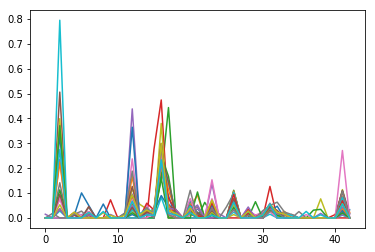

In [106]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

for member in set(list(post_view[:30]['member_id'])):
    plt.plot(range(43), show_user_profiling_id(member))
plt.show()